# Práctica 4 (Algoritmos)

* **Autor:** Axel Daniel Malváez Flores
* **Materia:** Matemáticas Discretas
* 5to semestre de la Licenciatura en Ciencia de Datos

In [1]:
# Librerías que utilizaremos
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import deque

## Algoritmo DFS
Implementado en el laboratorio

In [2]:
def dfs(g, v, visited=None, dfs_path=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    
    if dfs_path is None:
        dfs_path = []
        
    visited[v] = True
    dfs_path.append(v) # Aquí puede ir cualquier otra cosa
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited, dfs_path)
    return dfs_path

## Caminos

Algoritmos implementados en el laboratorio

In [3]:
def bfs_parents(g, v):
    parents = [None] * len(g.nodes)
    parents[v] = v
    
    q = deque()
    q.append(v)
    
    while(q):
        u = q.popleft()
        for w in g.adj[u]:
            if parents[w] is None:
                parents[w] = u
                q.append(w)
    parents[v] = None
    return parents    

def path(g, start, end):
    parents = bfs_parents(g, start)
    if parents[end] is None: # No están en la misma componente conexa
        return []
    else:
        out = [end]
        while parents[end] != start:
            end = parents[end]
            out.append(end)
        out.append(start)
    return out

# Ejercicios

## Ejercicio 1

Escribe una función `furthest_vertex(G, v)` que, dada una gráfica `G` y un vértice `v` encuentre la distancia más corta desde `v` hasta todos los vértices de la gráfica, y regrese el vértice más alejado.

Utiizando una lista auxiliar `listLenPaths`, guardamos las parejas (longitud del camino más corto, i) donde dado un vértice $v$ calculamos con la función ya hecha $path$ el camino más corto desde $v$ hasta un vértice $i$ para todo $i$ vértice de la gráfica. Así después obtenemos el camino de longitud máxima y regresamos el vértice $j$ al que está asociado en la tupla.

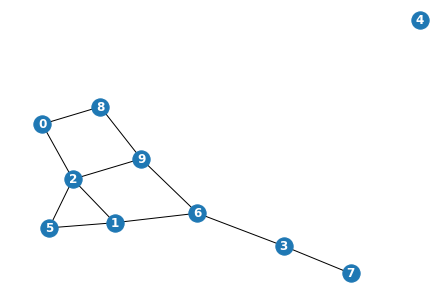

In [4]:
G = nx.gnp_random_graph(10, 1/5, seed=42)
nx.draw(G, with_labels=True, font_weight='bold', font_color="white")

In [5]:
# Aquí va tu código
def furthest_vertex(G, v): 
    listLenPaths = []
    for i in list(G.nodes):
        camino = path(G, v, i)
        listLenPaths.append((len(camino), i))
    mayor = 0
    vertice = 0
    for i in listLenPaths:
        if i[0] > mayor:
            mayor = i[0]
            vertice = i[1]
    return vertice

In [6]:
furthest_vertex(G, 5)

7

## Ejercicio 2

Escribe un algoritmo `num_connected(G)` que, dada una gráfica `G`, regrese el número de componentes conexas que tiene.


Utilizamos la función `dfs` como auxiliar que nos devuelve un el recorrido DFS desde un vértice dado. Con esto en la función `num_connected` teniendo igual una lista de vértices visitados, mientras existan vértices sin visitar, haremos DFS, este nos regresará una lista de vértices que recorrió, estos ahora ya fueron visitados y contamos una componente, si aún existen vértices sin visitar, repetimos el proceso con DFS en ese vértice aún no visitado. Finalmente devolvemos la variable que nos contó las componentes.

In [7]:
def dfs(g, v, visited=None, dfs_path=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    
    if dfs_path is None:
        dfs_path = []
        
    visited[v] = True
    dfs_path.append(v) # Aquí puede ir cualquier otra cosa
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited, dfs_path)
    return dfs_path

In [8]:
def num_connected(G):
    visited = [False]*len(G.nodes)
    count = 0
    while False in visited:
        DFS = dfs(G, visited.index(False))
        for i in DFS:
            visited[i] = True
        count += 1
    return count

15

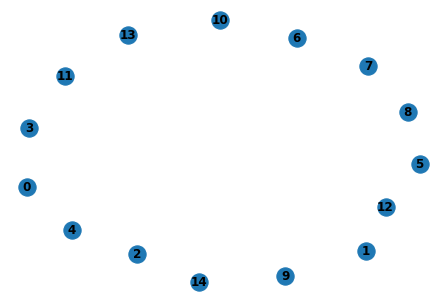

In [9]:
G = nx.gnp_random_graph(15, 1/199, seed=42)
nx.draw(G, with_labels=True, font_weight='bold')
num_connected(G)

## Ejercicio 3

Escribe una función `grid(m, n)` que, dados enteros `m`, `n`, genere una *gráfica de cuadrícula*. Cada vértice de la gráfica corresponde a una celda de la cuadrícula de tamaño $m\times n$, y existe una arista entre cada par de celdas adyacentes.

Compara tus resultados con `nx.grid_graph`.

In [10]:
def grid(m, n):
    ''' 
    Función que recibe dos enteros y nos genera una gráfica en forma de reja (grid)
    n - filas
    m - columnas
    '''
    vert1 = [x for x in range(m*n)]
    G = nx.Graph()
    G.add_nodes_from(vert1)

    # aristas en filas
    contador = 0
    for i in range(n):
        for j in range(m-1):
            G.add_edge(contador, contador + 1)
            contador += 1
        contador += 1
    
    # aristas en columnas
    for i in range(m):
        contador = i
        for j in range (n-1):
            G.add_edge(contador, contador+5)
            contador += 5

    fig, ax1 = plt.subplots(1, figsize=(6, 6))
    return nx.draw(G ,with_labels=True,pos=nx.spring_layout(G), ax=ax1)

Comparación:

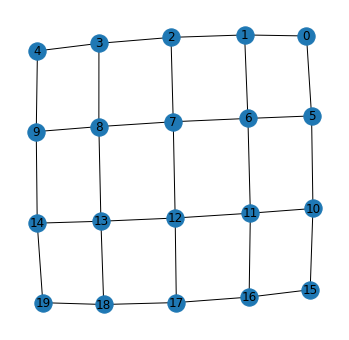

In [11]:
grid(5,4)

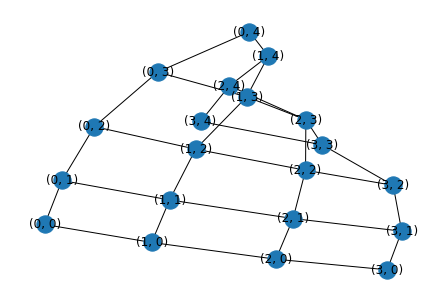

In [12]:
H = nx.grid_graph([5,4])
nx.draw(H, with_labels=True)

## Ejercicio 4

Escribe una función que `grid_to_graph(M)` convierta una matriz `M` (representada en Python como una lista de listas) a su equivalente gráfica de cuadrícula. Para esta tarea, cada entrada de la matriz será un número entero, y deberás de guardarlo en su correspondiente vértice bajo el atributo `value`. Adicionalmente, cada vértice debe de tener un nombre igual a su posición en la matriz, en la forma de una tupla.

Escribe otra función `graph_to_grid(G, tl)` que haga lo opuesto, i.e., convierta la gráfica `G` a su matriz equivalente. Como la representación es ambigua, el argumento `tl` especifica cuál es el vértice correspondiente a la celda en la esquina superior izquierda de la matriz (i.e., la `(0,0)`).

In [13]:
M = [
    [1, 2],
    [3, 4],
    [5, 6]
]

La gráfica equivalente es:

In [14]:
G = nx.Graph()
G.add_nodes_from([
    ((0, 0), {"value":1}), 
    ((0, 1), {"value":2}), 
    ((1, 0), {"value":3}), 
    ((1, 1), {"value":4}), 
    ((2, 0), {"value":5}), 
    ((2, 1), {"value":6})
])
G.add_edges_from([
    ((0, 0), (0, 1)),
    ((0, 0), (1, 0)),
    ((0, 1), (1, 1)),
    ((1, 0), (1, 1)),
    ((1, 0), (2, 0)),
    ((1, 1), (2, 1)),
    ((2, 0), (2, 1))
])

Graficando el nombre y valor de cada vértice:

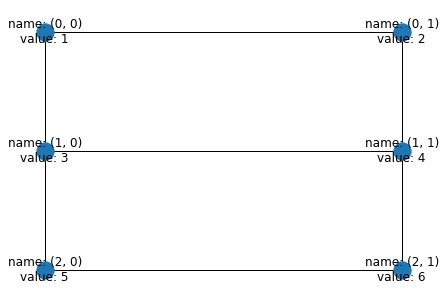

In [15]:
pos = {(i, j): (j, -i) for i in range(3) for j in range(2)}
labels = {}
for n in G.nodes:
    val = G.nodes[n]["value"]
    labels[n] = f"name: {n}\nvalue: {val}"

nx.draw(G, with_labels=True, pos=pos, labels=labels)

In [16]:
def proy_as_grid(G, n, m):
    ''' 
    Función que nos dibuja una gráfica G, con los
    parámetros n y m especificados. Es para 
    dibujar una gráfica con forma de matriz
    '''
    pos = {(i, j): (j, -i) for i in range(n) for j in range(m)}
    labels = {}
    for n in G.nodes:
        val = G.nodes[n]["value"]
        labels[n] = f"name: {n}\nvalue: {val}"

    nx.draw(G, with_labels=True, pos=pos, labels=labels)

In [17]:
def grid_to_graph(M):
    '''
    Función que dada una matriz, nos la convierte en un
    objeto gráfica
    '''
    G = nx.Graph()
    # Ya asignamos los nodos
    for i in range(len(M)):
        for j in range(len(M[0])):
            G.add_node((i,j), value=M[i][j])
    n = len(M) # filas
    m = len(M[0]) # columnas
    edges = []
    # aristas en filas
    for i in range(n):
        for j in range(m-1):
            edges.append(((i, j), (i, j+1)))
    # aristas en columnas
    for k in range(m):
        for l in range(n-1):
            edges.append(((l, k), (l+1, k)))
    G.add_edges_from(edges)
    return G

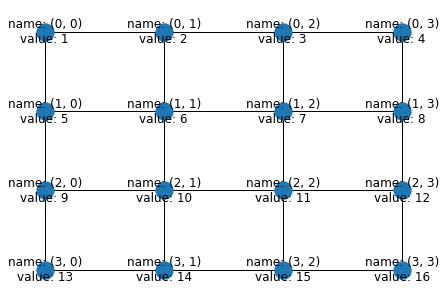

In [18]:
M = [
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16]
]

n = len(M) # filas
m = len(M[0]) # columnas

G = grid_to_graph(M)
proy_as_grid(G,n,m)

In [19]:
def graph_to_grid(G, tl):
    ''' 
    Función inversa de grid_to_graph. Esta recibe una gráfica
    al estilo matriz y la convierte en un array de numpy, es decir
    una matriz.
    ''' 
    nodos = G.nodes
    valores = nx.get_node_attributes(G, 'value')
    #valors = list(valores.items())
    m = 0
    while 1:
        if (tl[0], m) not in nodos:
            break
        m += 1

    n = 0
    while 1:
        if(n, tl[1]) not in nodos:
            break
        n += 1

    val = []
    for i in range(n):
        for j in range(m):
            val.append(valores[(i,j)])

    x = np.array(val)
    x = x.reshape((n,m))
    return x

In [20]:
graph_to_grid(G, (0,0))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

## Ejercicio 5

Dada una matriz de 0s y 1s, donde los 0s representan agua y los 1s tierra, escribe un algoritmo de NetworkX que cuente el número de *islas* que hay. Una isla se define como un conjunto de celdas de tierra conectadas por alguno de sus cuatro lados. Deberás usar las funciones del ejercicio anterior para covnertir la matriz a una gráfica.

Por ejemplo, consideremos la siguiente matriz:

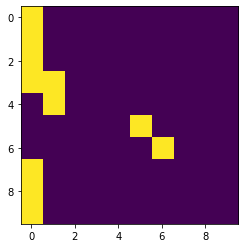

In [21]:
M = np.zeros((10, 10))
M[0, 0] = M[1, 0] = M[2, 0] = M[3, 0] = M[3, 1] = M[4, 1] = 1
M[5, 5] = 1
M[7, 0] = M[8, 0] = M[9, 0] = 1
M[6, 6] = 1

plt.imshow(M)

Tu función debe de regresar **4** islas (nota que las dos islas de la derecha están separadas, ya que solo se tocan diagonalmente).

La función principal es `num_islas`. La cual recibe una matriz (lista de listas), posteriormente con la función `grid_to_graph()`, hacemos la matriz una gráfica de *NetworkX* y verificamos para cada vértice, si su valor es 0, entonces eliminamos ese vértice (y sus aristas que inciden en él) y obtenemos una nueva gráfica sobre la cual iteraremos ahora. Si su valor no es 0, no hace nada, con esto finalmente tenemos una gráfica donde los vértices que quedan tienen valor 1 y puede que esta gráfica no sea conexa, por lo que llamamos a la función `num_connected2()` con la gráfica obtenida como argumento. Esta nueva función `num_connected2()`, lo que hace es tomar una gráfica y verificar cuantas componentes conexas tiene, hace uso de una función `dfs2()` que es una versión modificada de `dfs()`. Así finalmente el número de componentes conexas es el número de islas en la matriz.

In [22]:
# Aquí va tu función

#Versión de dfs modificada
def dfs2(g, v, visited=None, dfs_path=None):
    #Llenamos un diccionario con nodos y su valor boolean
    if visited is None:
        visited = {}
        for nodo in g.nodes:
            visited[nodo] = False
    
    # creamos el camino
    if dfs_path is None:
        dfs_path = []
    
    #marcamos al vértice como visitado y lo agregamos al camino
    visited[v] = True
    dfs_path.append(v) # Aquí puede ir cualquier otra cosa
    #hacemos recursión de dfs con cada vértice adyacente a v
    for u in g.adj[v]:
        if not visited[u]:
            dfs2(g, u, visited, dfs_path)
    return dfs_path

In [23]:
# Versión modificada de num_connected()
def num_connected2(G):
    #Marcamos a todos los vértices como no visitados
    visited = {}
    for nodo in G.nodes:
        visited[nodo] = False
    #sacamos una lista de los items del diccionario (nodo, valor bool)
    visitems = list(visited.items())
    #sacamos una lista dada visitems con los valores bool únicamente
    visiFalse = [y for x,y in visitems if y == False or y == True]
    count = 0
    #checamos el índice de donde aparece un False en la lista visiFalse
    indice = visiFalse.index(False)
    # Mientras existan vertices sin visitar
    while False in visiFalse:
        indice = visiFalse.index(False)
        #Les aplicamos DFS al vértice sin visitar
        DFS = dfs2(G, (visitems[indice])[0])
        # Cambiamos en visited los vertices que DFS nos arroja y por 
        # tanto ya fueron visitados
        for i in DFS:
            visited[i] = True
        # Actualizamos los valores de visitems y visiFalse
        visitems = list(visited.items())
        visiFalse = [y for x,y in visitems if y == False or y == True]
        count += 1
    return count

In [24]:
def num_islas(M):
    shape = M.shape
    # Convertimos nuestro grid en una gráfica
    G = grid_to_graph(M)
    # Para cada nodo de G verificaremos:
    for i in range(shape[0]):
        for j in range(shape[1]):
            # Si esta en G
            if (i,j) in G.nodes:
                # Sacamos los atributos de los nodos
                valores = nx.get_node_attributes(G, 'value')
                # Si su atributo valor del nodo es cero entonces lo removemos
                if valores[(i,j)] == 0:
                    G.remove_node((i,j))
    # Contamos las componentes conexas de la gráfica resultante de eliminar
    # vértices
    n_islas = num_connected2(G)
    return n_islas

In [25]:
num_islas(M)

4